In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
paths = ["trades_round_1_day_-2_wn.csv", "trades_round_1_day_-1_wn.csv", "trades_round_1_day_0_wn.csv", "trades_round_3_day_0_wn.csv", "trades_round_3_day_1_wn.csv", "trades_round_4_day_1_wn.csv", "trades_round_3_day_2_wn.csv", "trades_round_4_day_2_wn.csv", "trades_round_4_day_3_wn.csv"]
days = [0,1,2,2,3,3,4,4,5]

df = pd.DataFrame()
for i, path in enumerate(paths):
    new_df = pd.read_csv(path, delimiter=";")
    # add 1000000 to timestamp column
    new_df["timestamp"] = new_df["timestamp"] + 1000000 * days[i]
    df = pd.concat([df, new_df])

bidask_paths = ['prices_round_1_day_-2.csv', 'prices_round_2_day_-1.csv', 'prices_round_3_day_0.csv', 'prices_round_4_day_1.csv', 'prices_round_4_day_2.csv', 'prices_round_4_day_3.csv']

bidask_df = pd.DataFrame()
for i, path in enumerate(bidask_paths):
    new_df = pd.read_csv(path, delimiter=";")
    # add 1000000 to timestamp column
    new_df["timestamp"] = new_df["timestamp"] + 1000000 * i
    bidask_df = pd.concat([bidask_df, new_df])

In [4]:
gift_ba = bidask_df[bidask_df["product"]=="GIFT_BASKET"]
roses_ba = bidask_df[bidask_df["product"]=="ROSES"]
choc_ba = bidask_df[bidask_df["product"]=="CHOCOLATE"]
strawberries_ba = bidask_df[bidask_df["product"]=="STRAWBERRIES"]

In [6]:
gift_trade = df[df["symbol"]=="GIFT_BASKET"]
roses_trade = df[df["symbol"]=="ROSES"]
choc_trade = df[df["symbol"]=="CHOCOLATE"]
strawberries_trade = df[df["symbol"]=="STRAWBERRIES"]

In [7]:
print(gift_trade)

      timestamp    buyer    seller       symbol   currency    price  quantity
4       2001000     Ruby    Vinnie  GIFT_BASKET  SEASHELLS  71360.0         2
13      2003500  Rhianna    Vinnie  GIFT_BASKET  SEASHELLS  71340.0         2
17      2003800  Rhianna    Vinnie  GIFT_BASKET  SEASHELLS  71339.0         1
35      2009500   Vinnie      Ruby  GIFT_BASKET  SEASHELLS  71386.0         1
47      2013000     Ruby  Vladimir  GIFT_BASKET  SEASHELLS  71400.0         9
...         ...      ...       ...          ...        ...      ...       ...
3734    4982100     Ruby  Vladimir  GIFT_BASKET  SEASHELLS  69608.0         8
3737    4983300   Vinnie      Ruby  GIFT_BASKET  SEASHELLS  69567.0         1
3787    4996300   Vinnie   Rhianna  GIFT_BASKET  SEASHELLS  69480.0         1
3796    4997900     Ruby  Vladimir  GIFT_BASKET  SEASHELLS  69478.0         5
3800    4998900   Vinnie      Ruby  GIFT_BASKET  SEASHELLS  69550.0         5

[1765 rows x 7 columns]


In [65]:
# window_volatility = coconut['mid_price'].rolling(window=11, min_periods=11, ).std()

## graphing Rhianna vs market

In [8]:
# analyze vinnie vs market
r_buys = df[df["buyer"] == "Rhianna"]
r_sells = df[df["seller"] == "Rhianna"]

market_trades = df[(df["buyer"] != "Rhianna") & (df["seller"] != "Rhianna")]

In [30]:
r_self_trades = df[(df["buyer"] == "Rhianna") & (df["seller"] == "Rhianna")]

In [35]:
pd.unique(r_buys['symbol'])

array(['AMETHYSTS', 'STARFRUIT', 'ROSES', 'STRAWBERRIES', 'CHOCOLATE',
       'GIFT_BASKET', 'COCONUT_COUPON', 'COCONUT'], dtype=object)

# Rihanna gift basket

In [66]:
rose = df[df["symbol"] == "ROSES"]
choc = df[df["symbol"] == "CHOCOLATE"]
straw = df[df["symbol"] == "STRAWBERRIES"]

      timestamp   buyer   seller symbol   currency    price  quantity
0       2000000    Remy   Vinnie  ROSES  SEASHELLS  15001.0         3
2       2000200  Vinnie  Rhianna  ROSES  SEASHELLS  15000.0         3
5       2001200    Remy   Vinnie  ROSES  SEASHELLS  14997.0         1
7       2001400  Vinnie     Remy  ROSES  SEASHELLS  14994.0         3
8       2002600    Remy   Vinnie  ROSES  SEASHELLS  14974.0         5
...         ...     ...      ...    ...        ...      ...       ...
3784    4995000    Remy   Vinnie  ROSES  SEASHELLS  14383.0         4
3788    4996500    Remy   Vinnie  ROSES  SEASHELLS  14392.0         1
3790    4996900  Vinnie     Remy  ROSES  SEASHELLS  14387.0         5
3794    4997600    Remy   Vinnie  ROSES  SEASHELLS  14392.0         2
3799    4998900  Vinnie     Remy  ROSES  SEASHELLS  14404.0         5

[3105 rows x 7 columns]


In [34]:
r_gift_buys = r_buys[r_buys["symbol"] == "GIFT_BASKET"]
r_gift_sells = r_sells[r_sells["symbol"] == "GIFT_BASKET"]
m_gift_trades = market_trades[market_trades["symbol"] == "GIFT_BASKET"]

r_rose_buys = r_buys[r_buys["symbol"] == "ROSES"]
r_rose_sells = r_sells[r_sells["symbol"] == "ROSES"]
m_rose_trades = market_trades[market_trades["symbol"] == "ROSES"]

r_choc_buys = r_buys[r_buys["symbol"] == "CHOCOLATE"]
r_choc_sells = r_sells[r_sells["symbol"] == "CHOCOLATE"]
m_choc_trades = market_trades[market_trades["symbol"] == "CHOCOLATE"]

r_straw_buys = r_buys[r_buys["symbol"] == "STRAWBERRIES"]
r_straw_sells = r_sells[r_sells["symbol"] == "STRAWBERRIES"]
m_straw_trades = market_trades[market_trades["symbol"] == "STRAWBERRIES"]



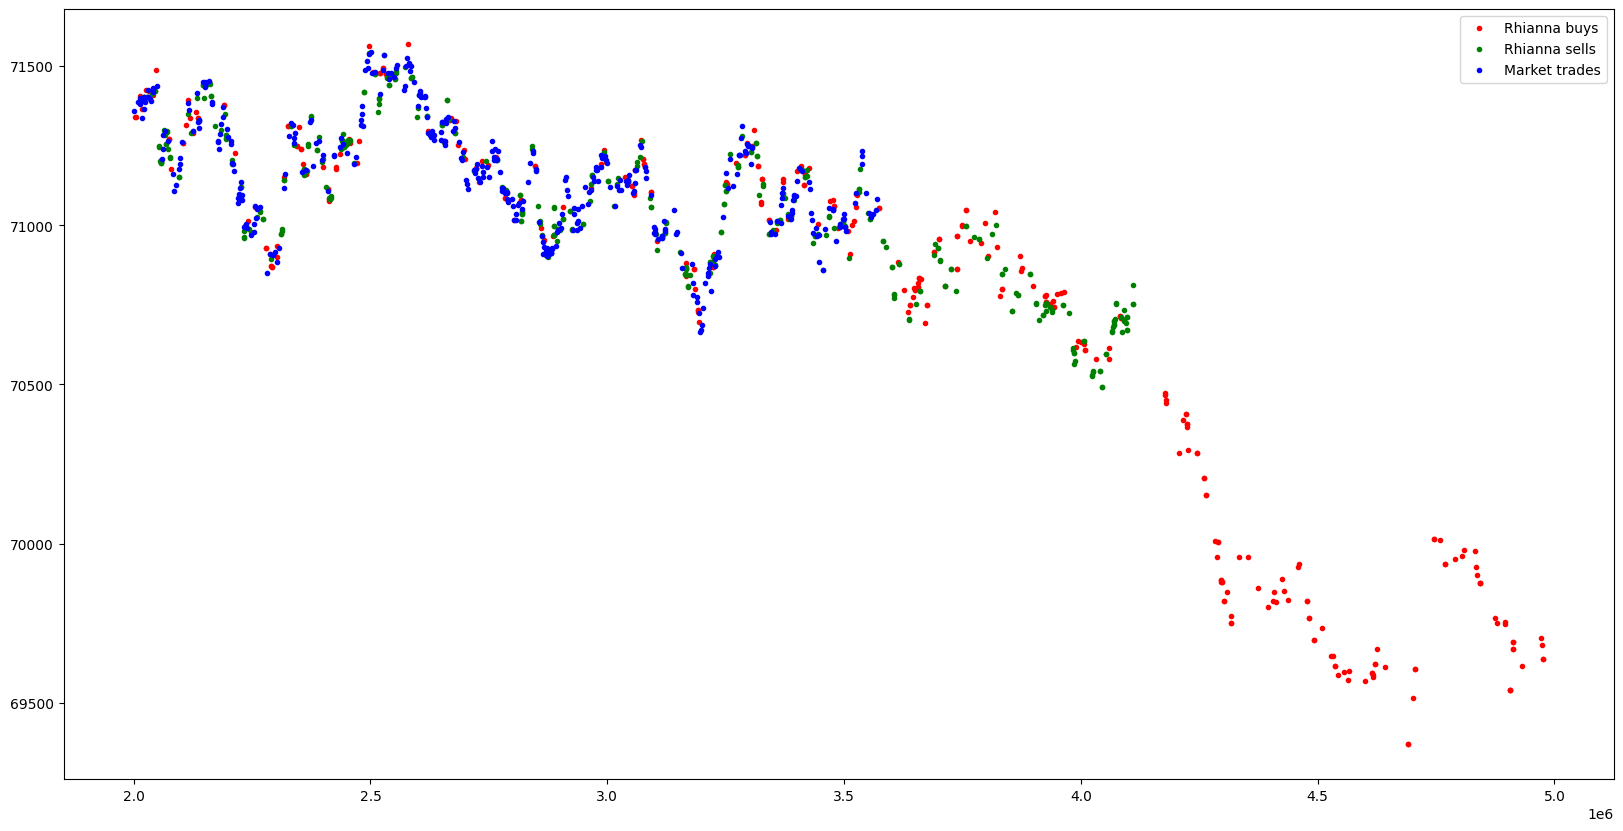

In [65]:
plt.figure(figsize=(20,10))
# plt.plot(gift_ba["timestamp"], gift_ba["bid_price_1"], 'r', markersize=3, label="Gift basket bid")
# plt.plot(gift_ba["timestamp"], gift_ba["ask_price_1"], 'g', markersize=3, label="Gift basket ask")
# plt.plot(gift_trade["timestamp"], gift_trade["price"], 'b', markersize=3, label="Gift basket trades")

no_t = len(m_gift_trades["timestamp"])//2
plt.plot(r_gift_buys["timestamp"][:no_t], r_gift_buys["price"][:no_t], 'ro', markersize=3, label="Rhianna buys")
plt.plot(r_gift_sells["timestamp"][:no_t], r_gift_sells["price"][:no_t], 'go', markersize=3, label="Rhianna sells")
plt.plot(m_gift_trades["timestamp"][:no_t], m_gift_trades["price"][:no_t], 'bo', markersize=3, label="Market trades")
plt.legend()

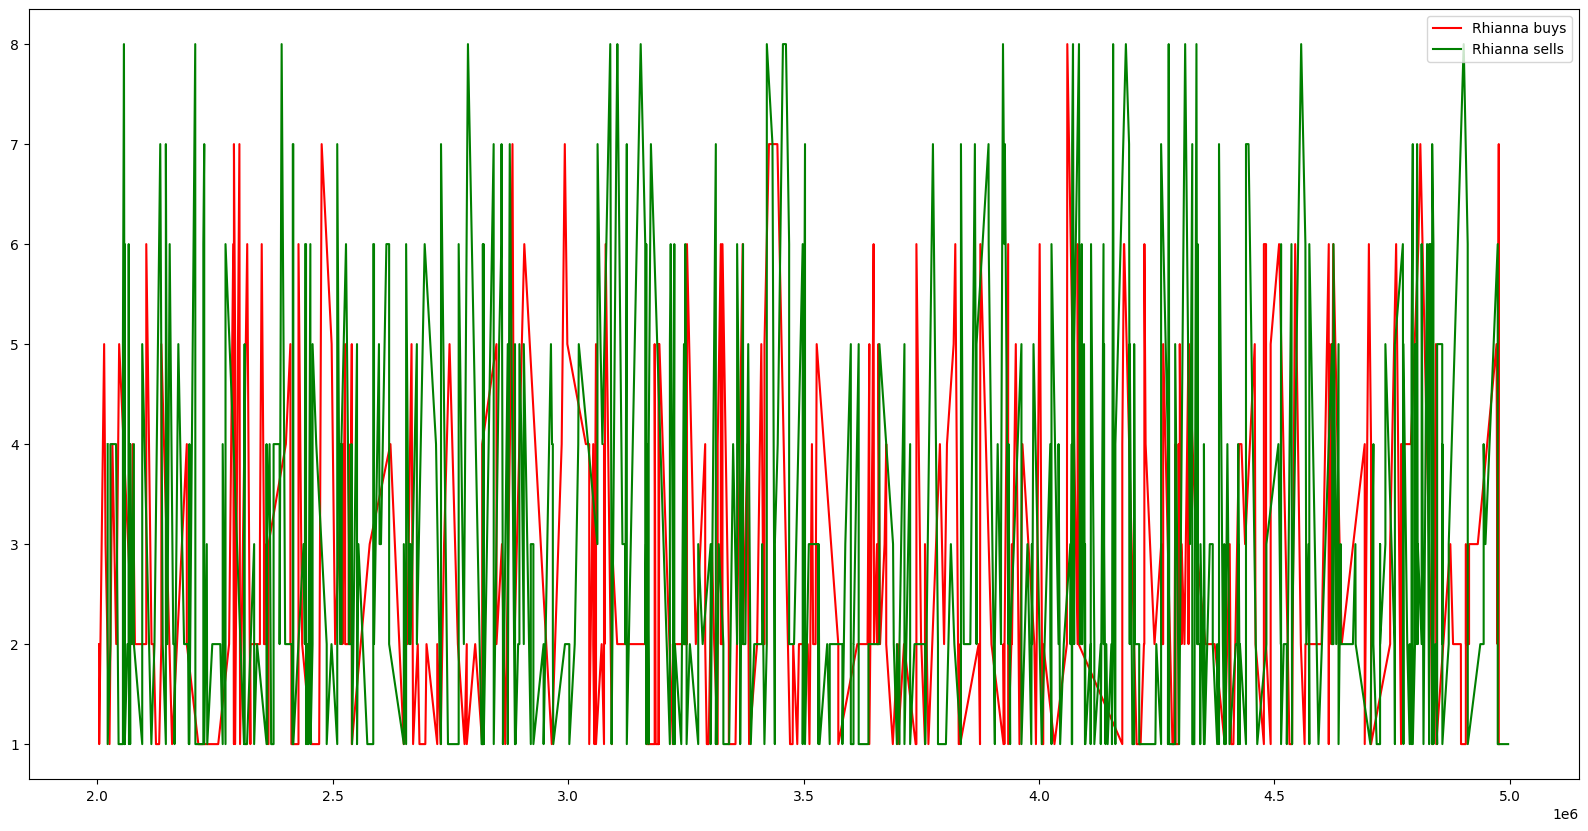

In [22]:
# rihanna quantity
plt.figure(figsize=(20,10))
plt.plot(r_gift_buys["timestamp"], r_gift_buys["quantity"], 'r', markersize=3, label="Rhianna buys")
plt.plot(r_gift_sells["timestamp"], r_gift_sells["quantity"], 'g', markersize=3, label="Rhianna sells")
# plt.plot(m_gift_trades["timestamp"], m_gift_trades["quantity"], 'bo', markersize=3, label="Market trades")
plt.legend()

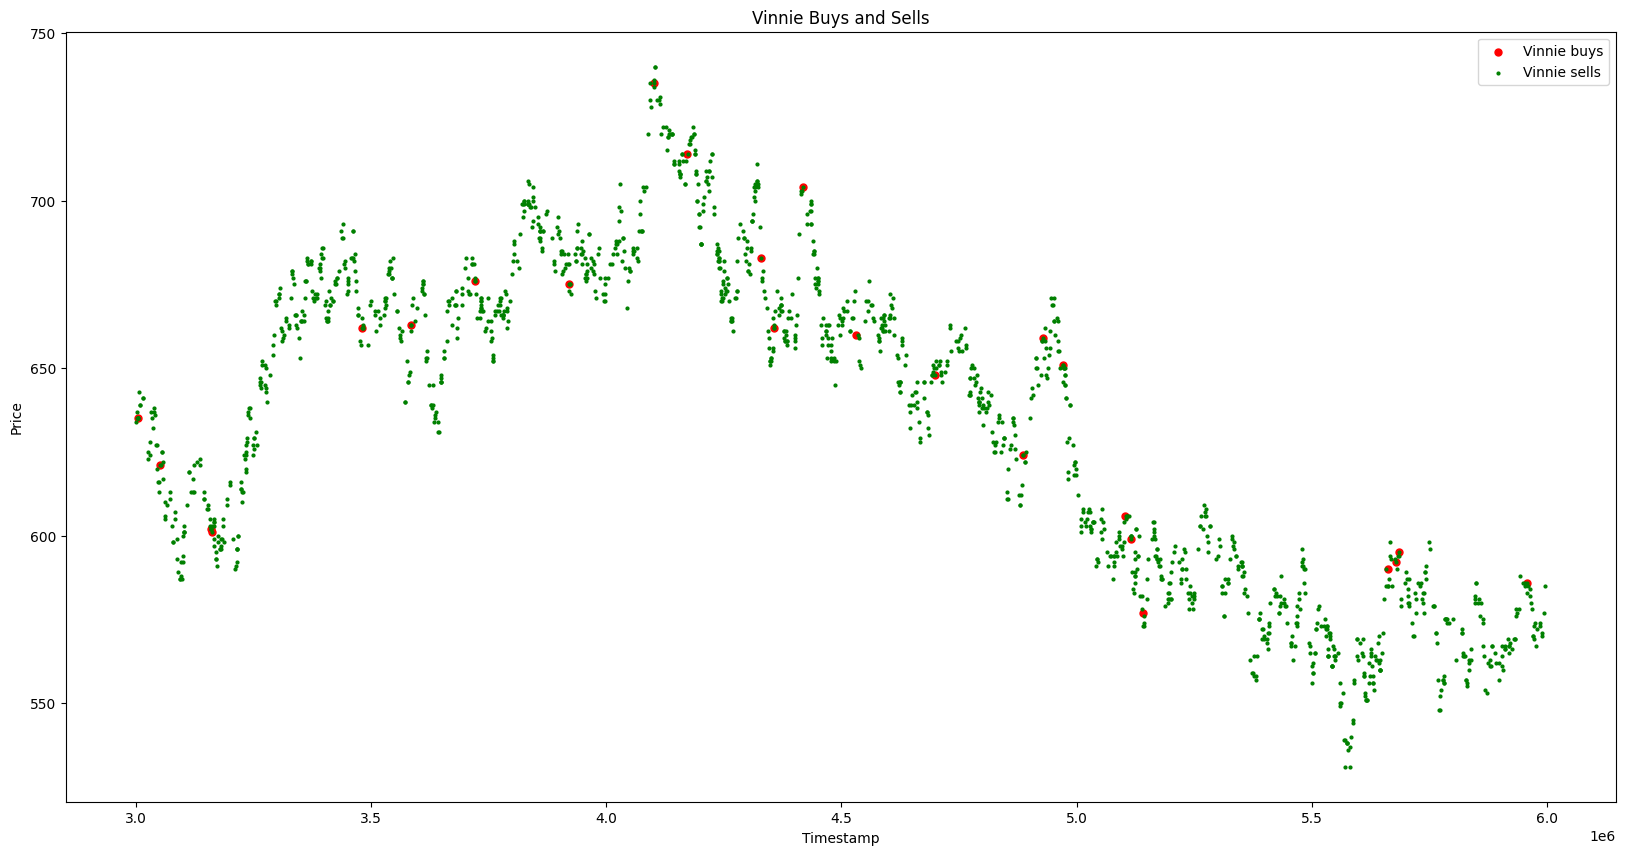

In [115]:
plt.figure(figsize=(20, 10))
# Plotting "Rhianna buys" and "Rhianna sells"
plt.scatter(r_buys['timestamp'], vinnie_coupon_buys['price'], label='Vinnie buys', s=25, color='red')
plt.scatter(vinnie_coupon_sells['timestamp'], vinnie_coupon_sells['price'], label='Vinnie sells', s=4, color='green')
# plt.scatter(vinnie_self_trades['timestamp'][:no_t], 50 *vinnie_self_trades['quantity'][:no_t], label='Vinnie self trades', s=4, color='black')
# plt.scatter(market_coupon_trades['timestamp'], market_coupon_trades['price'], label='Market trades', s=4, color='blue')

# plot vinnie self trades
# plt.scatter(vinnie_self_trades['timestamp'], vinnie_self_trades['price'], label='Vinnie self trades', s=4, color='black')
# plot market coconut trades
# nvm there are no non vinnie trades lol


# plotting quantity
# plt.scatter(vinnie_coupon_buys['timestamp'], vinnie_coupon_buys['quantity'], label='Vinnie buys', s=25, color='black')
# plt.scatter(vinnie_coupon_sells['timestamp'], vinnie_coupon_sells['quantity'], label='Vinnie sells', s=4, color='brown')
# plot vinnie coconut quantity
# no_t = len(vinnie_coco_buys['timestamp'])//60
# plt.scatter(vinnie_coco_buys['timestamp'][:no_t], vinnie_coco_buys['quantity'][:no_t], label='Vinnie buys', s=25, color='black')
# plt.scatter(vinnie_coco_sells['timestamp'][:no_t], vinnie_coco_sells['quantity'][:no_t], label='Vinnie sells', s=4, color='brown')


# Other plot configurations
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Vinnie Buys and Sells')
plt.legend()

# Show the plot
plt.show()

# plt.plot(vinnie_coupon_buys['timestamp'], vinnie_coupon_buys['price'], 'ro', label='Vinnie buys')
# plt.plot(vinnie_coupon_sells['timestamp'], vinnie_coupon_sells['price'], 'go', label='Vinnie sells')
# plt.plot(market_coupon_trades['timestamp'], market_coupon_trades['price'], label='Market trades')
# plt.legend()

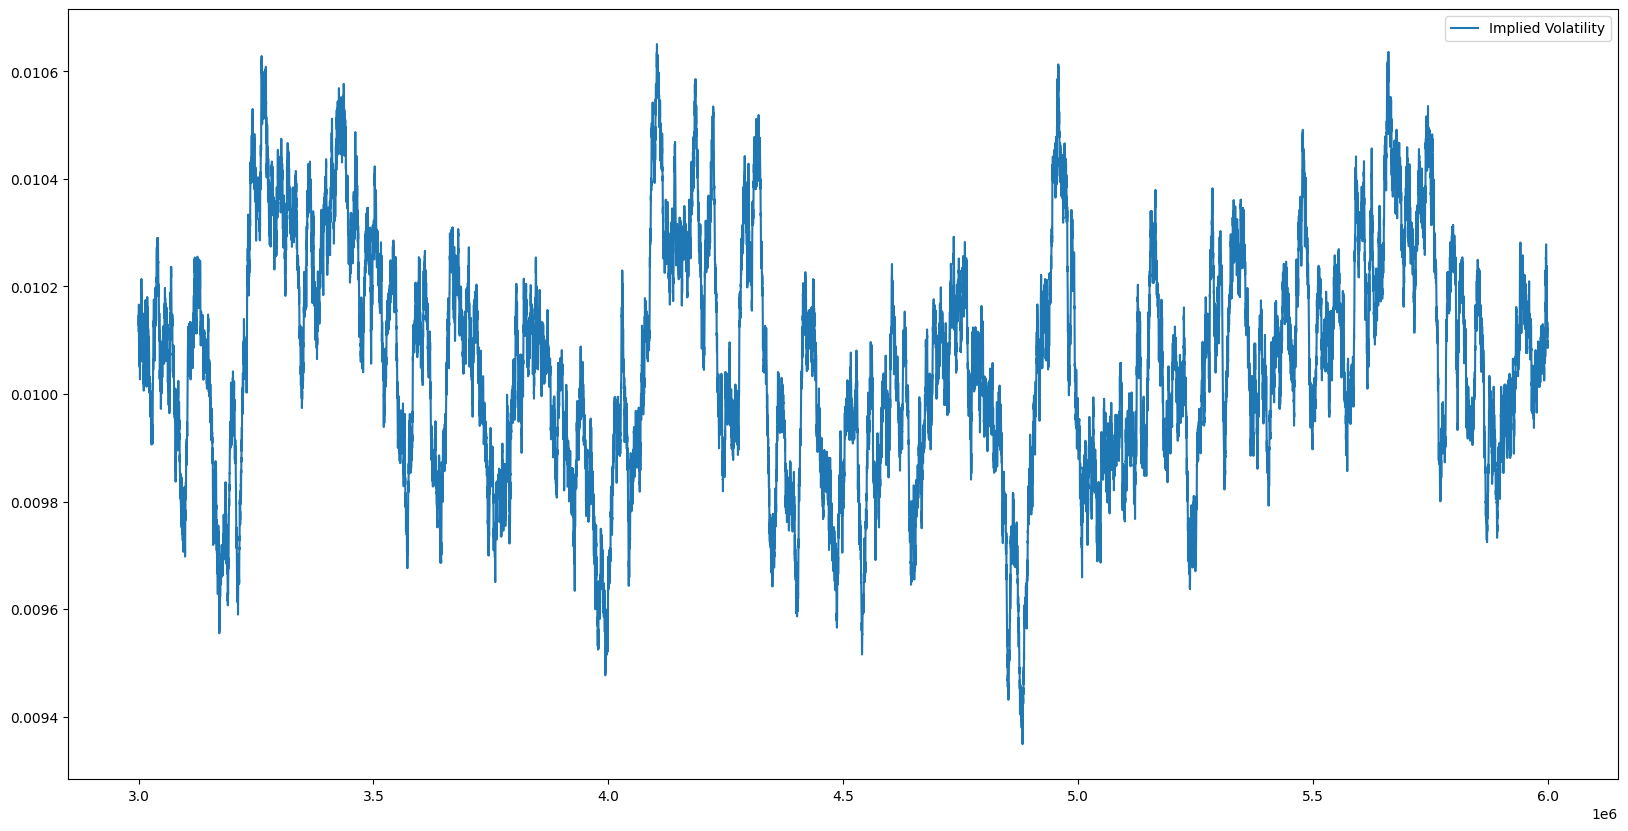

In [75]:
# plot the implied volatility
plt.figure(figsize=(20, 10))
plt.plot(coconut['timestamp'], IV, label='Implied Volatility')
# plt.plot(coconut['timestamp'], window_volatility, label='Window Volatility')
plt.legend()